In [16]:
from pymongo import MongoClient
import pandas as pd
import base64
from IPython.display import Image, display

client = MongoClient('mongodb+srv://leduyanh:1@cluster0.z0bblpv.mongodb.net/')
db = client['laptop_database_final']
collection = db['products']
data = collection.find()
document = collection.find_one({})


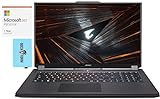

In [17]:
#Truy xuất ảnh từ mongodb
image_data = document['Image']
encoded_image = base64.b64encode(image_data).decode('utf-8')
display(Image(url=f"data:image/jpeg;base64,{encoded_image}"))

In [18]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv('../laptop_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18253 entries, 0 to 18252
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   _id                             18253 non-null  object
 1   Processor (CPU)                 18063 non-null  object
 2   Graphics card (GPU)             13223 non-null  object
 3   Memory (RAM)                    17887 non-null  object
 4   Screen size                     18252 non-null  object
 5   Screen resolution               17408 non-null  object
 6   Weight                          17251 non-null  object
 7   Hard drives                     17910 non-null  object
 8   Size (length x width x height)  16396 non-null  object
 9   Operating system (OS)           17110 non-null  object
 10  Release date                    18253 non-null  object
 11  Amazon.com Lowest New Price     18108 non-null  object
 12  Name                            18253 non-null

In [19]:
df.head()

,_id,Processor (CPU),Graphics card (GPU),Memory (RAM),Screen size,Screen resolution,Weight,Hard drives,Size (length x width x height),Operating system (OS),Release date,Amazon.com Lowest New Price,Name
0,6589cba38997406b55ed5eab,Intel Core i7-12700H,GeForce RTX 3070 Ti,64gb,17.3″,Full HD(1920 x 1080 pixels),6 lbs(2.72 kg),4000gb SSD,16 x 10 x 2 inches,Windows 11 Pro,"April 18, 2023","$4,679.00",Gigabyte AORUS 17 XE4
1,6589cba38997406b55ed5eac,Intel Core i5-1135G7,Intel Iris Xe,12gb,15.6″,Full HD(1920 x 1080 pixels),3.75 lbs(1.7 kg),250gb SSD,14.26 x 9.98 x 0.78 inches,Windows 11 Home,"February 25, 2022",$554.99,Lenovo IdeaPad 3 15″ (IdeaPad)
2,6589cba38997406b55ed5eaf,Intel Core i7-12700H,GeForce RTX 3070 Ti,64gb,16″,WQUXGA(3840 x 2400 pixels),5 lbs(2.27 kg),2000gb SSD,14.02 x 9.78 x 0.88 inches,Windows 11 Pro,"April 18, 2023","$2,364.00",Gigabyte AERO 16
3,6589cba38997406b55ed5eb0,Intel Core i5-10300H,GeForce GTX 1650,16gb,15.6″,Full HD(1920 x 1080 pixels),5.07 lbs(2.3 kg),500gb SSD,NaN,Windows 11,"March 8, 2022",$829.00,ASUS TUF F15 144Hz
4,6589cba38997406b55ed5eb1,Intel Pentium Gold 7505,NaN,20gb,15.6″,Full HD(1920 x 1080 pixels),3.74 lbs(1.7 kg),120gb SSD,14 x 9.8 x 0.78 inches,Windows 11 Home,"March 10, 2022",$479.00,Lenovo ideaPad 3i 15″ (82H801GGUS)


In [26]:
# Xử lý weight
import numpy as np
def convert_to_kg(weight):
    if pd.isna(weight):
        return np.nan
    try:
        return float(weight.split('(')[1].split(' ')[0])
    except (IndexError, ValueError):
        return np.nan


In [25]:
df['Weight'] = df['Weight'].apply(convert_to_kg)
df.head()

0        2.72
1        1.70
2        2.27
3        2.30
4        1.70
         ... 
18248    1.36
18249    1.70
18250    2.19
18251    2.05
18252    1.77
Name: Weight, Length: 18253, dtype: float64